In [3]:
import pandas as pd 
import numpy as np
#Creating dataframe
df = pd.read_csv('d5_retail_sales.csv', encoding = "latin") 


dfcsv = pd.DataFrame(df)
#Printing first 5 rows of dataset
dfcsv.head(5)



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

In [5]:
dfcsv.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
dfcsv.describe

<bound method NDFrame.describe of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  

In [7]:
dfcsv = dfcsv.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1)

In [8]:
dfcsv.isna().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [9]:
dfcsv = dfcsv['POSTALCODE'].fillna(dfcsv.POSTALCODE.mode(), inplace=True)
columns_to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'TERRITORY']

C:\Users\Shruti\AppData\Local\Temp\ipykernel_12392\1444751952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfcsv = dfcsv['POSTALCODE'].fillna(dfcsv.POSTALCODE.mode(), inplace=True)


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

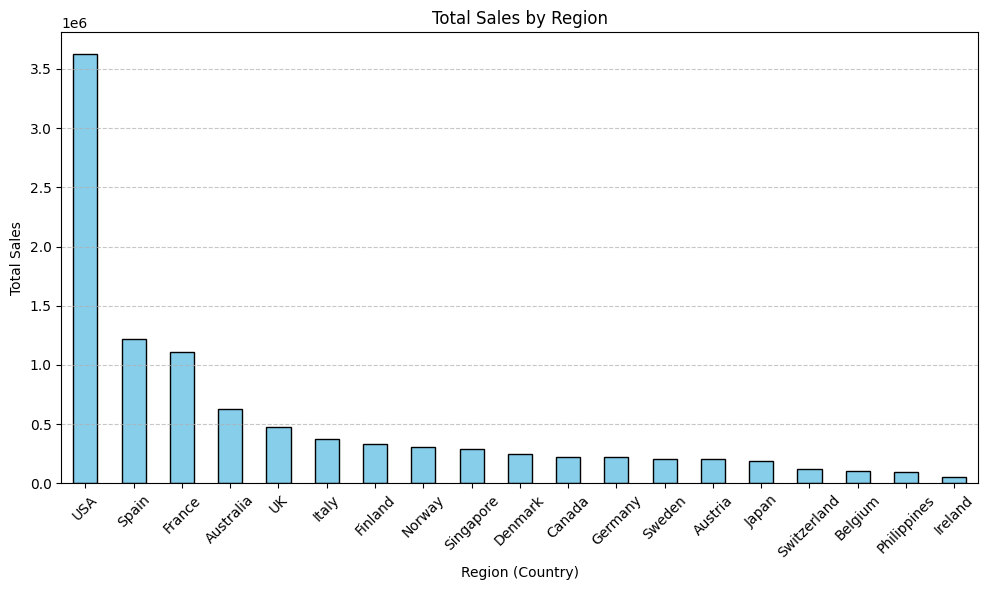


Top 5 Performing Regions:
 COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64


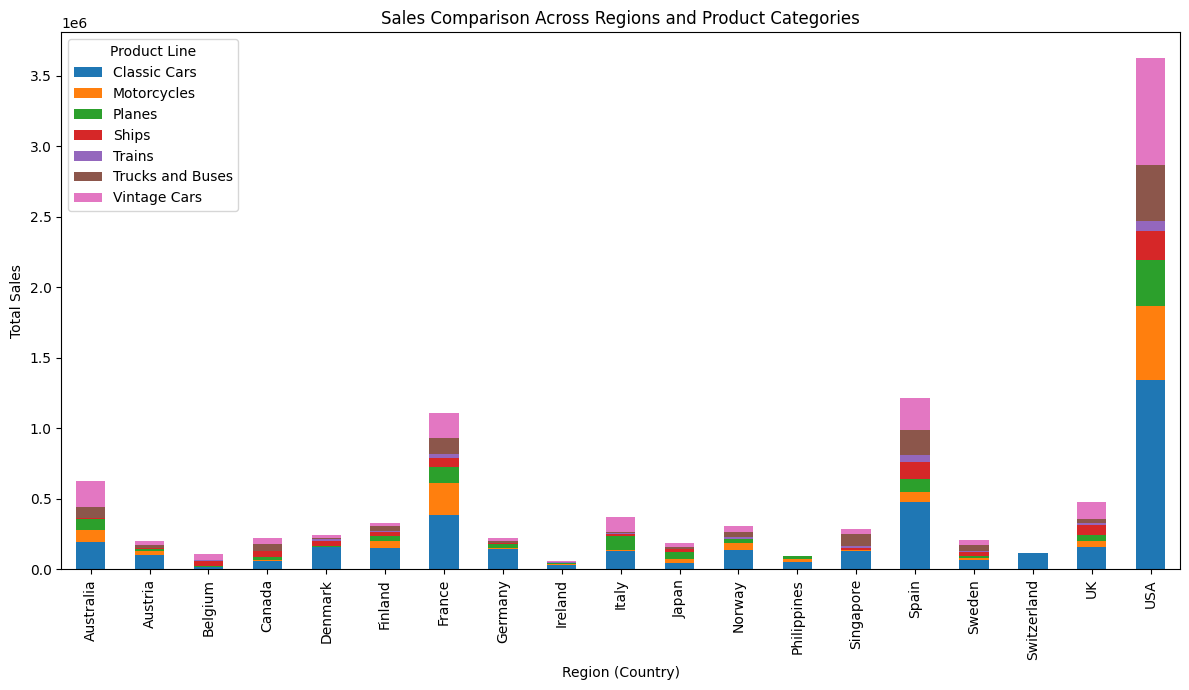

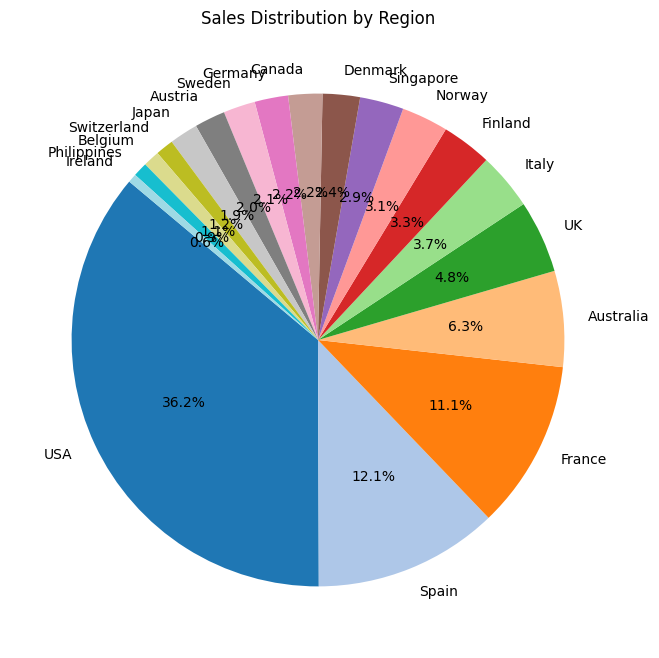

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Import dataset
df = pd.read_csv('d5_retail_sales.csv', encoding = "latin")

# 2️⃣ Explore dataset
print(df.head())
print(df.info())

# 3️⃣ Identify relevant columns
# We'll use: ORDERDATE, COUNTRY (as region), PRODUCTLINE, SALES

# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Drop missing values in important columns
df = df.dropna(subset=['COUNTRY', 'SALES', 'PRODUCTLINE'])

# 4️⃣ Group by region and calculate total sales
region_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)

# 5️⃣ Bar Plot - Sales distribution by region
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Sales by Region")
plt.xlabel("Region (Country)")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6️⃣ Identify top-performing regions
top_regions = region_sales.head(5)
print("\nTop 5 Performing Regions:\n", top_regions)

# 7️⃣ Group by region and product category
region_category_sales = df.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES'].sum().unstack().fillna(0)

# 8️⃣ Stacked Bar Plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title("Sales Comparison Across Regions and Product Categories")
plt.xlabel("Region (Country)")
plt.ylabel("Total Sales")
plt.legend(title="Product Line")
plt.tight_layout()
plt.show()

# ✅ Optional: Pie chart for regional sales share
plt.figure(figsize=(8,8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.ylabel('')
plt.title("Sales Distribution by Region")
plt.show()

